In [1]:
from pyspark.sql import SparkSession

app = SparkSession.builder \
    .appName("EMPLOYEES DATA ANALYSIS") \
    .config("spark.jars", "/path/to/mysql-connector-java-8.0.33.jar") \
    .getOrCreate()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np

In [4]:
host_name = "localhost"
port_number = 3306
database_name = "employees"
url = f"jdbc:mysql://{host_name}:{port_number}/{database_name}"

In [5]:
connection_properties = {

    "user":"root",
    "password":"",
    "driver":"com.mysql.cj.jdbc.Driver"
}

In [6]:
table1 = "employees"

In [7]:
try:
    employees_df = app.read.jdbc(url=url, table=table1, properties=connection_properties)
    employees_df.show()
except Exception as e:
    print(f"error as {e}")

+------+----------+----------+-----------+------+----------+
|emp_no|birth_date|first_name|  last_name|gender| hire_date|
+------+----------+----------+-----------+------+----------+
| 10001|1953-09-02|    Georgi|    Facello|     M|1986-06-26|
| 10002|1964-06-02|   Bezalel|     Simmel|     F|1985-11-21|
| 10003|1959-12-03|     Parto|    Bamford|     M|1986-08-28|
| 10004|1954-05-01| Chirstian|    Koblick|     M|1986-12-01|
| 10005|1955-01-21|   Kyoichi|   Maliniak|     M|1989-09-12|
| 10006|1953-04-20|    Anneke|    Preusig|     F|1989-06-02|
| 10007|1957-05-23|   Tzvetan|  Zielinski|     F|1989-02-10|
| 10008|1958-02-19|    Saniya|   Kalloufi|     M|1994-09-15|
| 10009|1952-04-19|    Sumant|       Peac|     F|1985-02-18|
| 10010|1963-06-01| Duangkaew|   Piveteau|     F|1989-08-24|
| 10011|1953-11-07|      Mary|      Sluis|     F|1990-01-22|
| 10012|1960-10-04|  Patricio|  Bridgland|     M|1992-12-18|
| 10013|1963-06-07| Eberhardt|     Terkki|     M|1985-10-20|
| 10014|1956-02-12|     

In [8]:
table2 = "departments"

In [9]:
try:
    dept_df = app.read.jdbc(url=url, table=table2, properties=connection_properties)
    dept_df.show()
except Error as e:
    print(f"error is: {e}")

+-------+------------------+
|dept_no|         dept_name|
+-------+------------------+
|   d009|  Customer Service|
|   d005|       Development|
|   d002|           Finance|
|   d003|   Human Resources|
|   d001|         Marketing|
|   d004|        Production|
|   d006|Quality Management|
|   d008|          Research|
|   d007|             Sales|
+-------+------------------+



In [10]:
table3 = "dept_emp"
try:
    deptemp_df = app.read.jdbc(url=url, table=table3, properties=connection_properties)
    deptemp_df.show()
except Error as e:
    print(f"error is: {e}")

+------+-------+----------+----------+
|emp_no|dept_no| from_date|   to_date|
+------+-------+----------+----------+
| 10001|   d005|1986-06-26|9999-01-01|
| 10002|   d007|1996-08-03|9999-01-01|
| 10003|   d004|1995-12-03|9999-01-01|
| 10004|   d004|1986-12-01|9999-01-01|
| 10005|   d003|1989-09-12|9999-01-01|
| 10006|   d005|1990-08-05|9999-01-01|
| 10007|   d008|1989-02-10|9999-01-01|
| 10008|   d005|1998-03-11|2000-07-31|
| 10009|   d006|1985-02-18|9999-01-01|
| 10010|   d004|1996-11-24|2000-06-26|
| 10010|   d006|2000-06-26|9999-01-01|
| 10011|   d009|1990-01-22|1996-11-09|
| 10012|   d005|1992-12-18|9999-01-01|
| 10013|   d003|1985-10-20|9999-01-01|
| 10014|   d005|1993-12-29|9999-01-01|
| 10015|   d008|1992-09-19|1993-08-22|
| 10016|   d007|1998-02-11|9999-01-01|
| 10017|   d001|1993-08-03|9999-01-01|
| 10018|   d004|1992-07-29|9999-01-01|
| 10018|   d005|1987-04-03|1992-07-29|
+------+-------+----------+----------+
only showing top 20 rows



In [11]:
table4 = "salaries"
try:
    salaries_df = app.read.jdbc(url=url, table=table4, properties=connection_properties)
    salaries_df.show()
except Error as e:
    print(f"error is: {e}")

+------+------+----------+----------+
|emp_no|salary| from_date|   to_date|
+------+------+----------+----------+
| 10001| 60117|1986-06-26|1987-06-26|
| 10001| 62102|1987-06-26|1988-06-25|
| 10001| 66074|1988-06-25|1989-06-25|
| 10001| 66596|1989-06-25|1990-06-25|
| 10001| 66961|1990-06-25|1991-06-25|
| 10001| 71046|1991-06-25|1992-06-24|
| 10001| 74333|1992-06-24|1993-06-24|
| 10001| 75286|1993-06-24|1994-06-24|
| 10001| 75994|1994-06-24|1995-06-24|
| 10001| 76884|1995-06-24|1996-06-23|
| 10001| 80013|1996-06-23|1997-06-23|
| 10001| 81025|1997-06-23|1998-06-23|
| 10001| 81097|1998-06-23|1999-06-23|
| 10001| 84917|1999-06-23|2000-06-22|
| 10001| 85112|2000-06-22|2001-06-22|
| 10001| 85097|2001-06-22|2002-06-22|
| 10001| 88958|2002-06-22|9999-01-01|
| 10002| 65828|1996-08-03|1997-08-03|
| 10002| 65909|1997-08-03|1998-08-03|
| 10002| 67534|1998-08-03|1999-08-03|
+------+------+----------+----------+
only showing top 20 rows



In [18]:
table5 = "dept_manager"
try:
    dept_manager_df = app.read.jdbc(url=url, table=table5, properties=connection_properties)
    dept_manager_df.show()
except Error as e:
    print(f"error is: {e}")

+------+-------+----------+----------+
|emp_no|dept_no| from_date|   to_date|
+------+-------+----------+----------+
|110022|   d001|1985-01-01|1991-10-01|
|110039|   d001|1991-10-01|9999-01-01|
|110085|   d002|1985-01-01|1989-12-17|
|110114|   d002|1989-12-17|9999-01-01|
|110183|   d003|1985-01-01|1992-03-21|
|110228|   d003|1992-03-21|9999-01-01|
|110303|   d004|1985-01-01|1988-09-09|
|110344|   d004|1988-09-09|1992-08-02|
|110386|   d004|1992-08-02|1996-08-30|
|110420|   d004|1996-08-30|9999-01-01|
|110511|   d005|1985-01-01|1992-04-25|
|110567|   d005|1992-04-25|9999-01-01|
|110725|   d006|1985-01-01|1989-05-06|
|110765|   d006|1989-05-06|1991-09-12|
|110800|   d006|1991-09-12|1994-06-28|
|110854|   d006|1994-06-28|9999-01-01|
|111035|   d007|1985-01-01|1991-03-07|
|111133|   d007|1991-03-07|9999-01-01|
|111400|   d008|1985-01-01|1991-04-08|
|111534|   d008|1991-04-08|9999-01-01|
+------+-------+----------+----------+
only showing top 20 rows



In [13]:
table6 = "titles"
try:
    titles_df = app.read.jdbc(url=url, table=table6, properties=connection_properties)
    titles_df.show()
except Error as e:
    print(f"error is: {e}")

+------+------------------+----------+----------+
|emp_no|             title| from_date|   to_date|
+------+------------------+----------+----------+
| 10001|   Senior Engineer|1986-06-26|9999-01-01|
| 10002|             Staff|1996-08-03|9999-01-01|
| 10003|   Senior Engineer|1995-12-03|9999-01-01|
| 10004|          Engineer|1986-12-01|1995-12-01|
| 10004|   Senior Engineer|1995-12-01|9999-01-01|
| 10005|      Senior Staff|1996-09-12|9999-01-01|
| 10005|             Staff|1989-09-12|1996-09-12|
| 10006|   Senior Engineer|1990-08-05|9999-01-01|
| 10007|      Senior Staff|1996-02-11|9999-01-01|
| 10007|             Staff|1989-02-10|1996-02-11|
| 10008|Assistant Engineer|1998-03-11|2000-07-31|
| 10009|Assistant Engineer|1985-02-18|1990-02-18|
| 10009|          Engineer|1990-02-18|1995-02-18|
| 10009|   Senior Engineer|1995-02-18|9999-01-01|
| 10010|          Engineer|1996-11-24|9999-01-01|
| 10011|             Staff|1990-01-22|1996-11-09|
| 10012|          Engineer|1992-12-18|2000-12-18|


In [14]:
employees_df.createOrReplaceTempView("emp")

In [15]:
dept_df.createOrReplaceTempView("dept")

In [16]:
deptemp_df.createOrReplaceTempView("dept_emp")

In [19]:
dept_manager_df.createOrReplaceTempView("dept_manager")

In [20]:
salaries_df.createOrReplaceTempView("salaries")

In [21]:
titles_df.createOrReplaceTempView("titles")

In [20]:
df_list = [employees_df, salaries_df, dept_df ,deptemp_df, dept_manager_df, titles_df]

for df in df_list:
    df_names = ["employees_df", "salaries_df", "dept_df", "deptemp_df", "dept_manager_df"]
    print(f"Descriptive Statistics :")
    df.describe().show()
    print("*************************************************")


Descriptive Statistics :
+-------+------------------+----------+---------+------+
|summary|            emp_no|first_name|last_name|gender|
+-------+------------------+----------+---------+------+
|  count|            300024|    300024|   300024|300024|
|   mean|253321.76339226196|      NULL|     NULL|  NULL|
| stddev|161828.23554037872|      NULL|     NULL|  NULL|
|    min|             10001|     Aamer|   Aamodt|     F|
|    max|            499999|    Zvonko|  dAstous|     M|
+-------+------------------+----------+---------+------+

*************************************************
Descriptive Statistics :
+-------+-----------------+------------------+
|summary|           emp_no|            salary|
+-------+-----------------+------------------+
|  count|           967330|            967330|
|   mean| 62483.9259570157|  63761.2043294429|
| stddev|34018.64769820685|16922.546114460103|
|    min|            10001|             38735|
|    max|           201771|            158220|
+-------+-

## RANK THE EMPLOYEES BASED ON THEIR MOST RECENT SALARY 

In [21]:
result = app.sql('''
                   with `most_recent_salary` as
                   (
                   select e.*,s.salary,
                   row_number() over(partition by s.emp_no order by s.from_date desc) as `rn`
                   from (emp as e) inner join (salaries as s)
                   on e.emp_no = s.emp_no
                   )
                   select emp_no,birth_date,concat(first_name," ",last_name) as `full_name`,
                   gender,hire_date,salary,
                   dense_rank() over(order by salary desc) as `salary_rank`
                   from most_recent_salary
                   where rn=1
                ''')
result.show(n=30)

+------+----------+--------------------+------+----------+------+-----------+
|emp_no|birth_date|           full_name|gender| hire_date|salary|salary_rank|
+------+----------+--------------------+------+----------+------+-----------+
| 43624|1953-11-14|      Tokuyasu Pesch|     M|1985-03-26|158220|          1|
| 47978|1956-03-24|     Xiahua Whitcomb|     M|1985-07-18|155709|          2|
|109334|1955-08-02|   Tsutomu Alameldin|     M|1985-02-15|155190|          3|
| 80823|1963-01-21|        Willard Baca|     M|1985-02-26|154459|          4|
| 46439|1953-01-31|        Ibibia Junet|     M|1985-05-20|150345|          5|
| 66793|1964-05-15|      Lansing Kambil|     M|1985-06-20|150052|          6|
| 37558|1963-08-16|Juichirou Thambid...|     M|1989-02-23|149440|          7|
| 36219|1964-10-09|     Vivian Minakawa|     F|1987-07-29|148820|          8|
| 91935|1961-05-28|        Oldrich Unni|     M|1988-01-30|147469|          9|
| 44465|1955-06-04|  Brigham Teitelbaum|     M|1987-03-17|146719

## ------------------------------------------------------------------------------------------------------

## find the duplicates

In [22]:
result = app.sql('''
                 select * from 
                 (
                 select *,
                 row_number() over(partition by emp_no,birth_date,first_name,last_name,gender,hire_date 
                 order by emp_no) as `rn`
                 from emp
                 ) as `duplicate_handling`
                 where `rn` > 2; 
                    
            ''')
result.show()

+------+----------+----------+---------+------+---------+---+
|emp_no|birth_date|first_name|last_name|gender|hire_date| rn|
+------+----------+----------+---------+------+---------+---+
+------+----------+----------+---------+------+---------+---+



## since no records retrieved there is no duplicates in our data

## -------------------------------------------------------------------------------------------------------

## find total no of employees working in each department

In [23]:
result1 = app.sql('''
          select d.dept_name,count(e.emp_no) as `Total no of employees`
          from (emp as e) inner join (dept_emp as de) 
          on e.emp_no = de.emp_no
          inner join (dept as d) 
          on d.dept_no = de.dept_no
          group by d.dept_name
        ''')
result1.show()

+------------------+---------------------+
|         dept_name|Total no of employees|
+------------------+---------------------+
|             Sales|                52245|
|Quality Management|                20117|
|           Finance|                17346|
|        Production|                73485|
|          Research|                21126|
|  Customer Service|                23580|
|         Marketing|                20211|
|       Development|                85707|
|   Human Resources|                17786|
+------------------+---------------------+



In [24]:
df1 = result1.toPandas()
df1.columns

Index(['dept_name', 'Total no of employees'], dtype='object')

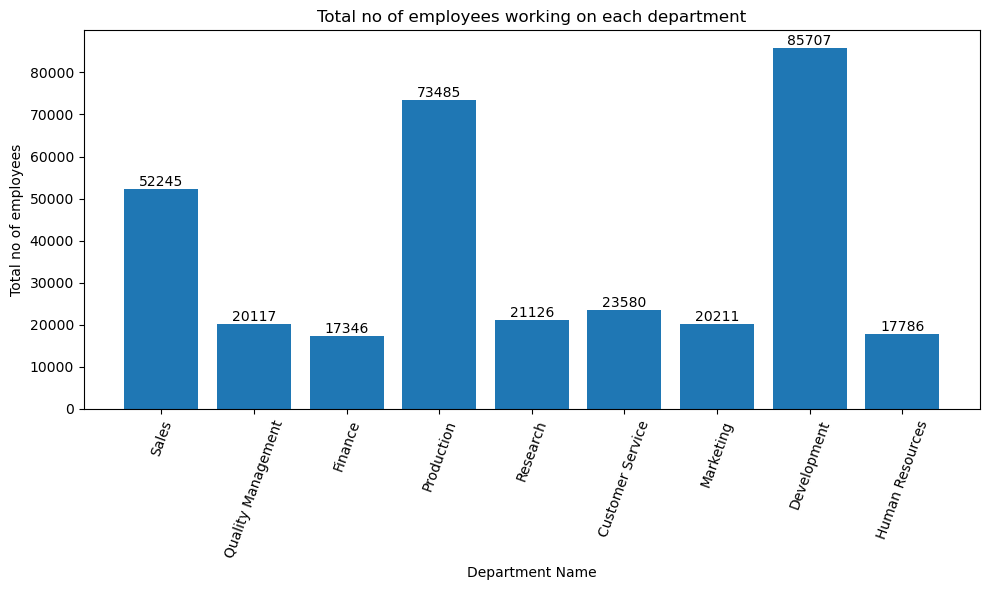

In [25]:
# Sample data (replace with your own df1 data)
dept_names = df1['dept_name']
total_employees = df1['Total no of employees']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(dept_names, total_employees)

# Add titles and labels
ax.set_title('Total no of employees working on each department')
ax.set_xlabel('Department Name')
ax.set_ylabel('Total no of employees')

# Rotate x-axis labels for better readability
plt.xticks(rotation=70)

# Display total employees on top of each bar
for i, value in enumerate(total_employees):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

## --> DEPARTMENT DEVELOPMENT HAS MORE EMPLOYEES AMONG 

## ALL DEPARMENTS IN THE COMPANY

## ------------------------------------------------------------------------------------------------------------

## find employees whose salary is greaterthan their department average salary

In [26]:
result2 = app.sql(
                    '''
                    with dept_avg_salary as
                    (
                    select d.dept_name,e.emp_no,e.first_name,e.last_name,e.gender,s.salary,
                    avg(salary) over(partition by d.dept_name ) as `dept_avg_sal`
                    from emp e inner join salaries s 
                    on e.emp_no = s.emp_no
                    inner join dept_emp de
                    on e.emp_no = de.emp_no
                    inner join dept d 
                    on d.dept_no = de.dept_no
                    )
                    select * from dept_avg_salary
                    where salary > `dept_avg_sal`
                    
                    '''
                    )
result2.show()

+---------+------+-----------+---------+------+------+-----------------+
|dept_name|emp_no| first_name|last_name|gender|salary|     dept_avg_sal|
+---------+------+-----------+---------+------+------+-----------------+
|    Sales| 10234|Arunachalam| Bakhtari|     M| 84584|80776.62039654997|
|    Sales| 10234|Arunachalam| Bakhtari|     M| 85768|80776.62039654997|
|    Sales| 10234|Arunachalam| Bakhtari|     M| 87361|80776.62039654997|
|    Sales| 10234|Arunachalam| Bakhtari|     M| 90986|80776.62039654997|
|    Sales| 10234|Arunachalam| Bakhtari|     M| 93052|80776.62039654997|
|    Sales| 10234|Arunachalam| Bakhtari|     M| 96269|80776.62039654997|
|    Sales| 10234|Arunachalam| Bakhtari|     M| 96294|80776.62039654997|
|    Sales| 10234|Arunachalam| Bakhtari|     M|100366|80776.62039654997|
|    Sales| 10234|Arunachalam| Bakhtari|     M|102754|80776.62039654997|
|    Sales| 10254|       Shen|  Brattka|     M| 83198|80776.62039654997|
|    Sales| 10254|       Shen|  Brattka|     M| 856

## ----------------------------------------------------------------------------------------------------------

## find the average, max and min salary in each department

In [27]:
result3 = app.sql(
                    '''
                    select d.dept_no, d.dept_name, avg(s.salary) as `dept avg sal`,
                    max(s.salary) as `dept max sal`, min(s.salary) as `dept min sal`
                    from (dept as d) inner join (dept_emp as de)
                    on d.dept_no = de.dept_no
                    inner join ( salaries as s)
                    on s.emp_no = de.emp_no
                    group by d.dept_no, d.dept_name
                    '''
                )

result3.show()

+-------+------------------+------------------+------------+------------+
|dept_no|         dept_name|      dept avg sal|dept max sal|dept min sal|
+-------+------------------+------------------+------------+------------+
|   d007|             Sales| 80776.62039654997|      158220|       39427|
|   d004|        Production| 59539.78990774039|      132552|       38836|
|   d003|   Human Resources|55353.520326471196|      123674|       38735|
|   d002|           Finance| 70159.46621971931|      134662|       38812|
|   d001|         Marketing| 71901.72367418648|      143644|       39127|
|   d009|  Customer Service| 58755.44062676491|      144866|       38836|
|   d008|          Research|59866.243526736595|      124181|       38851|
|   d005|       Development| 59503.57499466995|      144434|       38850|
|   d006|Quality Management|57294.657039259815|      122376|       38928|
+-------+------------------+------------------+------------+------------+



In [28]:
df2 = result3.toPandas()
df2

,dept_no,dept_name,dept avg sal,dept max sal,dept min sal
0,d007,Sales,80776.620397,158220,39427
1,d004,Production,59539.789908,132552,38836
2,d003,Human Resources,55353.520326,123674,38735
3,d002,Finance,70159.466220,134662,38812
4,d001,Marketing,71901.723674,143644,39127
5,d009,Customer Service,58755.440627,144866,38836
6,d008,Research,59866.243527,124181,38851
7,d005,Development,59503.574995,144434,38850
8,d006,Quality Management,57294.657039,122376,38928


In [29]:
df2.columns

Index(['dept_no', 'dept_name', 'dept avg sal', 'dept max sal', 'dept min sal'], dtype='object')

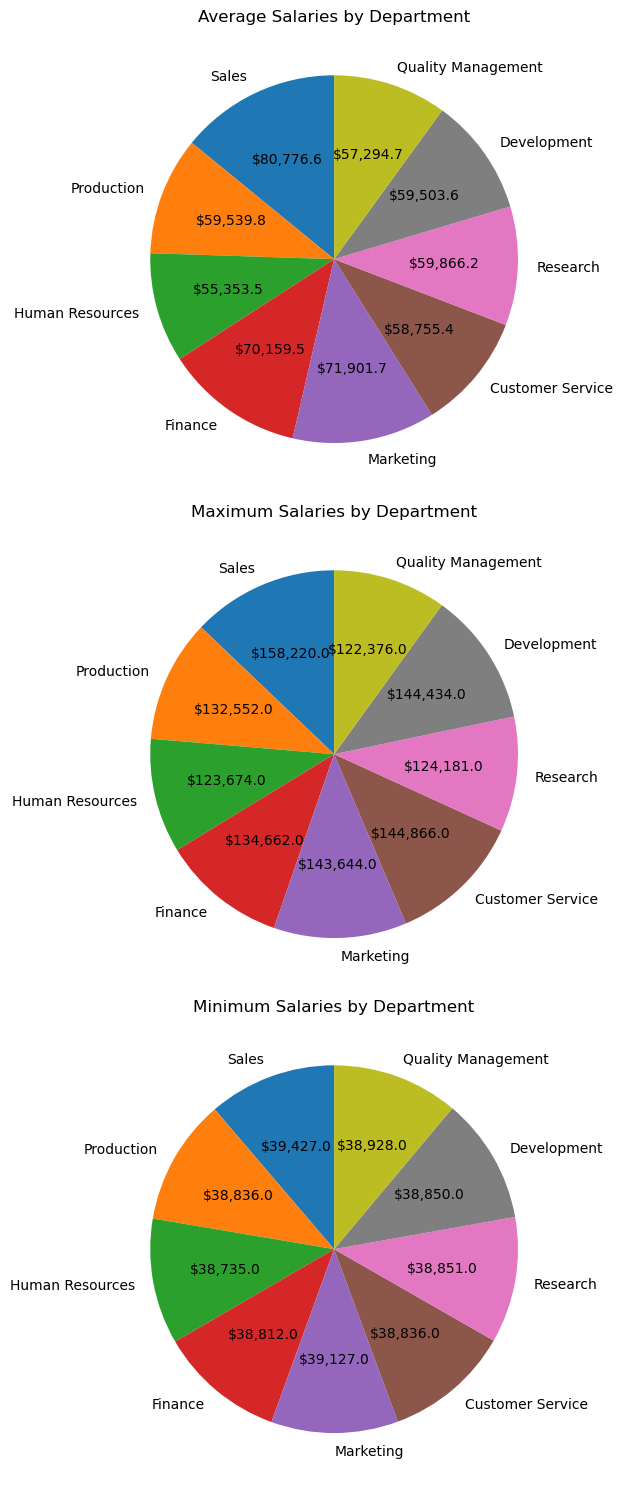

In [30]:
# Sample data (replace with your actual df2 data)
dept_names = df2['dept_name']
avg_salaries = df2['dept avg sal']
max_salaries = df2['dept max sal']
min_salaries = df2['dept min sal']

# Function to format the labels inside the pie chart
def format_amount(x):
    return f'${x:,.1f}'  # Format salary as currency with 2 decimal places

# Create a figure with 3 subplots (3 rows, 1 column)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Pie chart for average salaries (1st row)
axs[0].pie(avg_salaries, labels=dept_names, autopct=lambda p: format_amount(p * sum(avg_salaries) / 100), startangle=90)
axs[0].set_title("Average Salaries by Department")

# Pie chart for maximum salaries (2nd row)
axs[1].pie(max_salaries, labels=dept_names, autopct=lambda p: format_amount(p * sum(max_salaries) / 100), startangle=90)
axs[1].set_title("Maximum Salaries by Department")

# Pie chart for minimum salaries (3rd row)
axs[2].pie(min_salaries, labels=dept_names, autopct=lambda p: format_amount(p * sum(min_salaries) / 100), startangle=90)
axs[2].set_title("Minimum Salaries by Department")

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## The average salary in the sales department is comparitively higher than all the other departments in the company

## --------------------------------------------------------------------------------------------------

## find all employees who are earning morethan their manager salary

In [31]:
result4 = app.sql(
                    '''
                    with managers as
                    (
                    select distinct(dept_no) as `manager_dept_no`, dm.emp_no as `manager_no`,s.salary as `manager_salary`
                    from (dept_manager as dm) inner join (salaries as s) 
                    on dm.emp_no = s.emp_no
                    )
                    ,employees as
                    (
                    select d.dept_no,e.*,s.salary
                    from (emp as e) inner join (salaries as s)
                    on e.emp_no = s.emp_no
                    inner join (dept_emp as de)
                    on de.emp_no = e.emp_no
                    inner join (dept as d) on d.dept_no = de.dept_no
                    )
                    ,distinct_employees as
                    (
                    select *,
                    row_number() over(partition by e.emp_no order by e.emp_no) as `rn`
                    from
                    (employees as e) inner join (managers as m)
                    on e.dept_no = m.manager_dept_no
                    where e.salary > m.manager_salary
                    )
                    select * from distinct_employees
                    '''
                    )

result4.show(n=1000)

+-------+------+----------+----------+---------+------+----------+------+---------------+----------+--------------+---+
|dept_no|emp_no|birth_date|first_name|last_name|gender| hire_date|salary|manager_dept_no|manager_no|manager_salary| rn|
+-------+------+----------+----------+---------+------+----------+------+---------------+----------+--------------+---+
|   d009| 10011|1953-11-07|      Mary|    Sluis|     F|1990-01-22| 42365|           d009|    111692|         40000|  1|
|   d009| 10011|1953-11-07|      Mary|    Sluis|     F|1990-01-22| 42365|           d009|    111784|         40000|  2|
|   d009| 10011|1953-11-07|      Mary|    Sluis|     F|1990-01-22| 42365|           d009|    111784|         41189|  3|
|   d009| 10011|1953-11-07|      Mary|    Sluis|     F|1990-01-22| 42365|           d009|    111939|         40000|  4|
|   d009| 10011|1953-11-07|      Mary|    Sluis|     F|1990-01-22| 42365|           d009|    111939|         40285|  5|
|   d009| 10011|1953-11-07|      Mary|  

## --------------------------------------------------------------------------------------------------

## find the top-20 employees who are all earning morethan their manager salary

In [32]:
result4 = app.sql(
                    '''
                    with managers as
                    (
                    select distinct(dept_no) as `manager_dept_no`, dm.emp_no as `manager_no`,s.salary as `manager_salary`
                    from (dept_manager as dm) inner join (salaries as s) 
                    on dm.emp_no = s.emp_no
                    )
                    ,employees as
                    (
                    select d.dept_no,e.emp_no, birth_date, concat(first_name,' ',last_name) as `employee_name`,
                    e.gender, e.hire_date,s.salary
                    from (emp as e) inner join (salaries as s)
                    on e.emp_no = s.emp_no
                    inner join (dept_emp as de)
                    on de.emp_no = e.emp_no
                    inner join (dept as d) on d.dept_no = de.dept_no
                    )
                    ,distinct_employees as
                    (
                    select *,
                    row_number() over(partition by e.emp_no order by e.salary desc) as `rn`
                    from
                    (employees as e) inner join (managers as m)
                    on e.dept_no = m.manager_dept_no
                    where e.salary > m.manager_salary
                    )
                    select * 
                    from distinct_employees 
                    where rn in(1)
                    limit 20
                    '''
                    )

result4.show()

+-------+------+----------+------------------+------+----------+------+---------------+----------+--------------+---+
|dept_no|emp_no|birth_date|     employee_name|gender| hire_date|salary|manager_dept_no|manager_no|manager_salary| rn|
+-------+------+----------+------------------+------+----------+------+---------------+----------+--------------+---+
|   d005| 10006|1953-04-20|    Anneke Preusig|     F|1989-06-02| 60098|           d005|    110567|         40000|  1|
|   d008| 10007|1957-05-23| Tzvetan Zielinski|     F|1989-02-10| 88070|           d008|    111400|         72446|  1|
|   d004| 10010|1963-06-01|Duangkaew Piveteau|     F|1989-08-24| 80324|           d004|    110386|         40000|  1|
|   d009| 10011|1953-11-07|        Mary Sluis|     F|1990-01-22| 56753|           d009|    111692|         40000|  1|
|   d003| 10013|1963-06-07|  Eberhardt Terkki|     M|1985-10-20| 68901|           d003|    110228|         40000|  1|
|   d005| 10018|1954-06-19|     Kazuhide Peha|     F|198

In [33]:
df3 = result4.toPandas()

In [34]:
df3.columns

Index(['dept_no', 'emp_no', 'birth_date', 'employee_name', 'gender',
       'hire_date', 'salary', 'manager_dept_no', 'manager_no',
       'manager_salary', 'rn'],
      dtype='object')

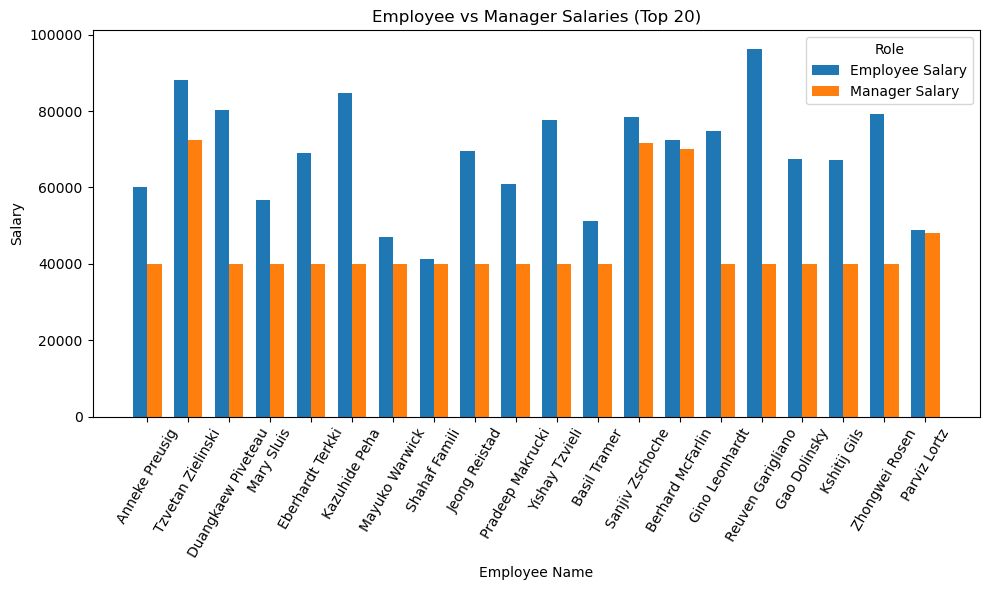

In [35]:
# Sample data (replace with your actual df3 data)
employee_names = df3['employee_name'][:20]  # Top 20 employees
employee_salaries = df3['salary'][:20]
manager_salaries = df3['manager_salary'][:20]

# Set positions for the bars
x = np.arange(len(employee_names))  # The label locations
width = 0.35  # Width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
bars1 = ax.bar(x - width/2, employee_salaries, width, label='Employee Salary')
bars2 = ax.bar(x + width/2, manager_salaries, width, label='Manager Salary')


# Customize labels and title
ax.set_xlabel('Employee Name')
ax.set_ylabel('Salary')
ax.set_title('Employee vs Manager Salaries (Top 20)')
ax.set_xticks(x)
ax.set_xticklabels(employee_names, rotation=60)
ax.legend(title='Role')

# Show the plot
plt.tight_layout()
plt.show()

## -------------------------------------------------------------------------------------------------------------

## find the total number of employees working under each managers {direct reports}

In [36]:
result5 = app.sql(
        '''
        with manager as
        (
        select emp_no as `manager_emp_no`,dept_no  as `manager_dept_no`
        from dept_manager
        )
        ,employees as
        (
        select e.emp_no,concat(e.first_name,' ',e.last_name) as `emp_name`,
        d.dept_no
        from (emp as e) inner join (dept_emp as de)
        on e.emp_no = de.emp_no
        inner join (dept as d) 
        on d.dept_no = de.dept_no
        )
        select `e`.`dept_no`, `e`.`emp_no`, `e`.`emp_name`, 
        `m`.`manager_dept_no`, `m`.`manager_emp_no`
        from (employees as e) right join (manager as m)
        on e.dept_no = m.manager_dept_no
        '''    
        )

result5.show(n=200)

+-------+------+--------------------+---------------+--------------+
|dept_no|emp_no|            emp_name|manager_dept_no|manager_emp_no|
+-------+------+--------------------+---------------+--------------+
|   d005| 10018|       Kazuhide Peha|           d005|        110511|
|   d005| 10022|       Shahaf Famili|           d005|        110511|
|   d005| 10043|      Yishay Tzvieli|           d005|        110511|
|   d005| 10075|        Gao Dolinsky|           d005|        110511|
|   d005| 10090|      Kendra Hofting|           d005|        110511|
|   d005| 10121|     Guoxiang Ramsay|           d005|        110511|
|   d005| 10143|  Sakthirel Bakhtari|           d005|        110511|
|   d005| 10206|    Alassane Iwayama|           d005|        110511|
|   d005| 10264|    Nalini Kawashimo|           d005|        110511|
|   d005| 10290|    Yongmao Pleszkun|           d005|        110511|
|   d005| 10345|       Arra Ratnakar|           d005|        110511|
|   d005| 10366|       Morrie Piaz

In [37]:
# Create a temporary view from the result DataFrame
result5.createOrReplaceTempView("temp_manager_employee_view")

In [38]:
result6 = app.sql(
    
                '''
                select m.emp_name as `manager_name`,count(e.emp_no)  as `direct reports`
                from (temp_manager_employee_view as e) inner join (temp_manager_employee_view as m)
                on e.manager_emp_no = m.emp_no
                group by manager_name
                ''' 
                )

result6.show(n=5000)

+--------------------+--------------+
|        manager_name|direct reports|
+--------------------+--------------+
|Przemyslawa Kaelb...|        104490|
|   Tonny Butterworth|         94320|
|     Karsten Sigstam|         35572|
|        Arie Staelin|         42252|
|          Dung Pesch|         80468|
|          Ebru Alpin|         34692|
|      Rutger Hofmeyr|         80468|
|      Oscar Ghazalie|        293940|
|   Vishwani Minakawa|         40422|
|         Shem Kieras|        293940|
|    Xiaobin Spinelli|         94320|
|Shirish Ossenbruggen|         35572|
|      Sanjoy Quadeer|         80468|
|       Leon DasSarma|        171414|
|   Peternela Onuegbe|         80468|
|   DeForest Hagimont|        171414|
|       Hilary Kambil|         42252|
|    Marjo Giarratana|         94320|
|Margareta Markovitch|         40422|
|    Isamu Legleitner|         34692|
|   Krassimir Wegerle|        293940|
|        Rosine Cools|        293940|
|         Hauke Zhang|        104490|
|     Yuchan

In [39]:
df4 = result6.toPandas()

In [40]:
df4.columns

Index(['manager_name', 'direct reports'], dtype='object')

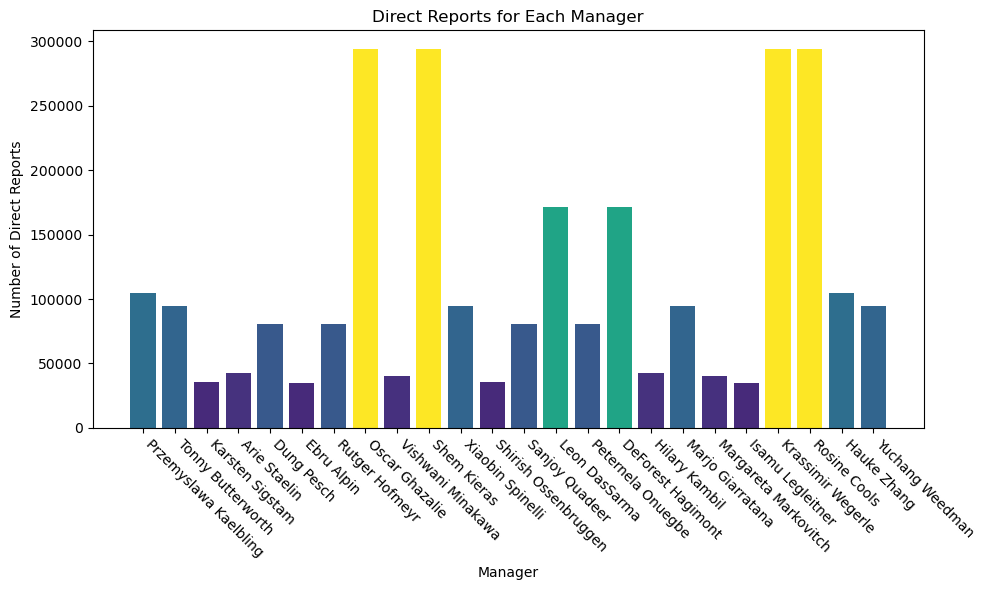

In [41]:
# Sample data (replace with your actual df4 data)
manager_names = df4['manager_name']
direct_reports = df4['direct reports']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
bars = ax.bar(manager_names, direct_reports, color=plt.cm.viridis(direct_reports / max(direct_reports)))  # Color based on the number of direct reports

# Add labels and title
ax.set_title('Direct Reports for Each Manager')
ax.set_xlabel('Manager')
ax.set_ylabel('Number of Direct Reports')

# Rotate x-axis labels for better readability
plt.xticks(rotation=-45, ha='left')


# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

## the managers Oscar Ghazalie, Shem Kieras, Krassimir Wegerle, Rosine Cools have more direct reports compared to other managers

## ---------------------------------------------------------------------------------------------------------

## total salary spent by the company on each department

In [23]:
result7 = app.sql('''
                   select t.title,sum(s.salary) as `total salary`
                   from (salaries as s) inner join (titles as t)
                   on t.emp_no = s.emp_no
                   group by t.title
                  
                  ''')
result7.show()

+------------------+------------+
|             title|total salary|
+------------------+------------+
|             Staff| 23957302653|
|Assistant Engineer|  2953968927|
|      Senior Staff| 25741613278|
|   Senior Engineer| 23488895868|
|          Engineer| 22685856219|
|           Manager|    25966617|
|  Technique Leader|  2920244370|
+------------------+------------+



In [24]:
df5 = result7.toPandas()

In [25]:
df5.columns

Index(['title', 'total salary'], dtype='object')

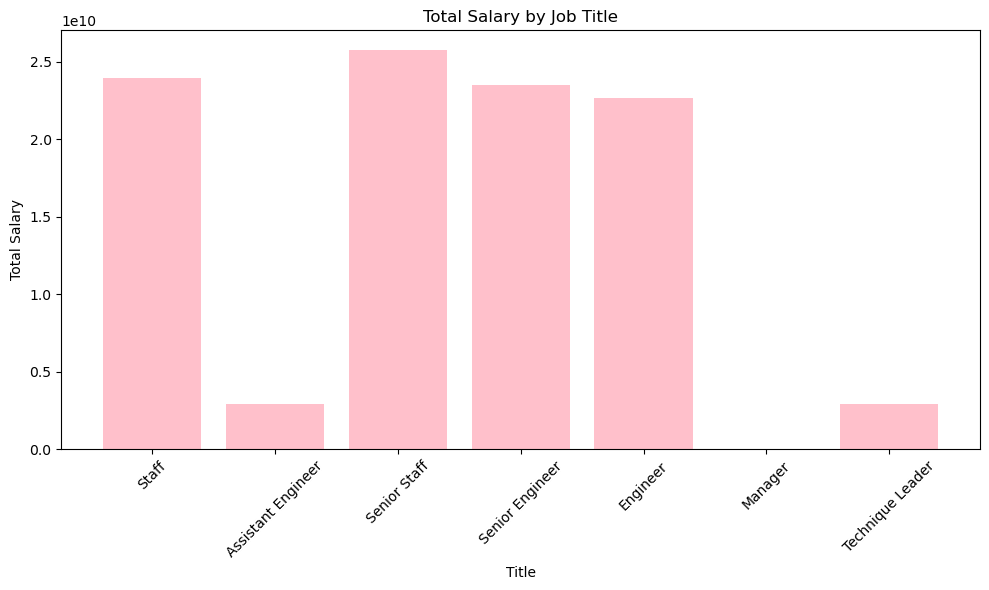

In [28]:
# Assuming df5 has columns 'title' and 'total_salary'
plt.figure(figsize=(10, 6))
plt.bar(df5['title'], df5['total salary'], color='pink')

# Add labels and title
plt.xlabel('Title')
plt.ylabel('Total Salary')
plt.title('Total Salary by Job Title')

# Show the plot
plt.xticks(rotation=45)  # Rotate titles if needed
plt.tight_layout()
plt.show()

## The copany spent more salary on the job designation {Senior staffs} which is nearly {2.5} - billion

## The expression 1e10 represents 1 × 10¹⁰, which is 10,000,000,000 (ten billion).

## ---------------------------------------------------------------------------------------------------

In [33]:
result8 = app.sql('''
                   select year(s.from_date)as `year`,AVG(s.salary) as `average salary`
                   from (salaries as s) inner join (emp as e)
                   on s.emp_no = e.emp_no
                   group by year
                  
                  ''')
result8.show()

+----+------------------+
|year|    average salary|
+----+------------------+
|1990| 57783.80456168289|
|1988| 55865.36318980735|
|1997|64478.140580549334|
|1994|61643.287093093284|
|1991| 58742.61329164449|
|1989| 56781.01435112627|
|1996|63547.501804179235|
|1998| 65494.42038019924|
|1985| 53419.77624979777|
|1987| 55036.68085216402|
|1995| 62584.01507427906|
|2001| 70647.82123303127|
|1992| 59679.22504512548|
|2000|  68515.5739294464|
|1986|54303.321741854634|
|1999| 66501.25195197907|
|2002| 72622.58835416667|
|1993|60656.125052235686|
+----+------------------+



In [34]:
df6 = result8.toPandas()
df6.columns

Index(['year', 'average salary'], dtype='object')

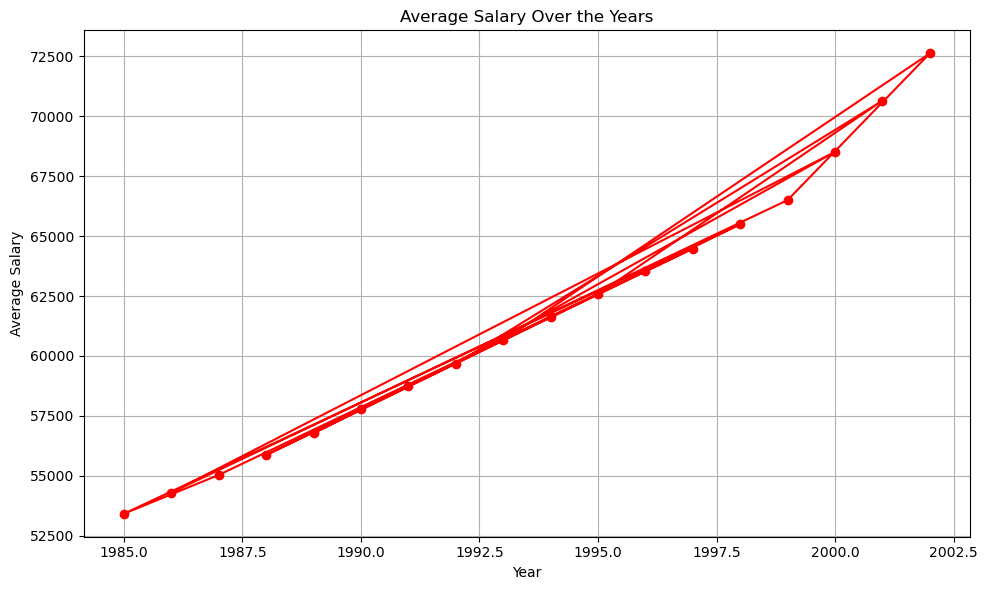

In [37]:
# Assuming df6 has columns 'year' and 'average_salary'
plt.figure(figsize=(10, 6))
plt.plot(df6['year'], df6['average salary'], marker='o', color='r', linestyle='-', markersize=6)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary Over the Years')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## The year and salary columns are highly positively correlated
## therefore the salary spent by the company is increasing year by year

## --------------------------------------------------------------------------------------------------------------

In [46]:
result9 = app.sql(

                 '''
                 select timestampdiff(year, e.birth_date, '2000-01-01') as `age`,
                 count(e.emp_no) as `total employees`,avg(s.salary) as `average salary`, 
                 max(s.salary) as `maximum salary`, min(s.salary) as `minimum salary`
                 from (emp as e) inner join (salaries as s)
                 on e.emp_no = s.emp_no
                 group by age
                 '''
                 )

result9.show()

+---+---------------+------------------+--------------+--------------+
|age|total employees|    average salary|maximum salary|minimum salary|
+---+---------------+------------------+--------------+--------------+
| 34|           5802| 62824.57687004481|        121744|         39473|
| 43|          72470| 63610.61003173727|        155709|         38928|
| 39|          73356| 63533.03851082393|        142506|         38836|
| 41|          73953| 64039.39833407705|        145215|         39036|
| 44|          74861| 63613.53923939034|        155377|         38851|
| 37|          73675|63606.386155412285|        141399|         38735|
| 35|          73764|   63690.172902771|        150052|         39046|
| 36|          74422| 64003.83496815458|        154459|         38812|
| 38|          75135| 63759.92769015772|        147469|         39062|
| 42|          72940| 63759.56432684398|        140974|         39050|
| 46|          74462| 63874.29926674008|        158220|         39257|
| 40| 

In [47]:
df7 = result9.toPandas()
df7.columns

Index(['age', 'total employees', 'average salary', 'maximum salary',
       'minimum salary'],
      dtype='object')

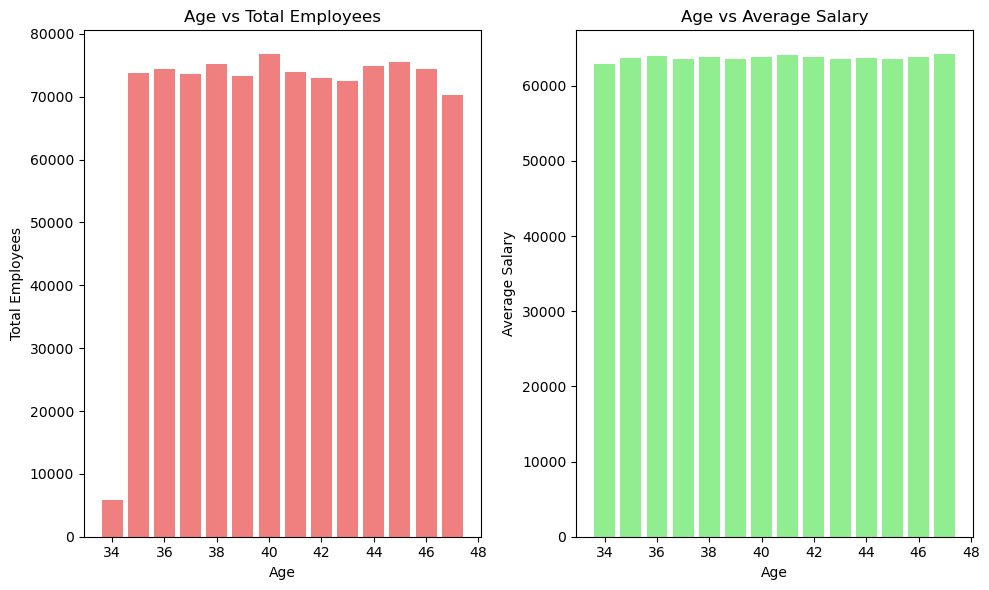

In [51]:
# Set the figure size for the plots
plt.figure(figsize=(10, 6))

# Bar chart for Total Employees by Age
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.bar(df7['age'], df7['total employees'], color='lightcoral')
plt.title('Age vs Total Employees')
plt.xlabel('Age')
plt.ylabel('Total Employees')

# Bar chart for Average Salary by Age
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.bar(df7['age'], df7['average salary'], color='lightgreen')
plt.title('Age vs Average Salary')
plt.xlabel('Age')
plt.ylabel('Average Salary')

# Adjust the layout so everything fits
plt.tight_layout()

# Show the plot
plt.show()

## Average salary spent by the company on every age category is almost same

## -------------------------------------------------------------------------------------------------------------

In [52]:
app.stop()